In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Cleaning

In [2]:
# Read in dataset
df = pd.read_csv('Life-Expectancy-Data-Updated.csv')
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


## Metadata
| Field                       | Description                                                                                               |
|-----------------------------|-----------------------------------------------------------------------------------------------------------|
| Region                      | 179 countries are distributed in 9 regions. E.g. Africa, Asia, Oceania etc                                |
| Year                        | Years observed from 2000 to 2015                                                                          |
| Infant_deaths               | Represents infant deaths per 1000 population                                                              |
| Under_five_deaths           | Represents deaths of children under five years old per 1000 population                                    |
| Adult_mortality             | Represents deaths of adults per 1000 population                                                           |
| Alcohol_consumption         | Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old   |
| Hepatitis_B                 | Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.                           |
| Measles                     | Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds   |
| BMI                         | Measure of nutritional status in adults  (kg/m**2)                                                        |
| Polio                       | Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.                                  |
| Diphtheria                  | Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds |
| Incidents_HIV               | Incidents of HIV per 1000 population aged 15-49                                                           |
| GDP_per_capita              | GDP per capita in current USD($)                                                                          |
| Population_mln              | Total population in millions                                                                              |
| Thinness_ten_nineteen_years | Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 stdev below the median                |
| Thinness_five_nine_years    | Prevalence of thinness among children aged 5-9 years. BMI < -2 stdev below the median.                    |
| Schooling                   | Average years that people aged 25+ spent in formal education                                              |
| Economy_status_Developed    | Developed country                                                                                         |
| Economy_status_Developing   | Developing country                                                                                        |
| Life_expectancy             | Average life expectancy of both genders in different years from 2010 to 2015                              |

In [3]:
# Check shape of dataframe
df.shape

(2864, 21)

In [4]:
# Check for null values
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [5]:
# Check for duplicated rows
df.duplicated().sum()

0

In [6]:
# Check dtypes
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [7]:
# Get statistics of data
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


In [8]:
# Copy dataframe
temp_df = df.copy()

# Drop unnecessary columns
temp_df.drop(columns=['Country','Year'], inplace=True)

- Dropped country and year as they are not relevant in predicting life expectancy
- Region will be used in the model and will be one hot encoded during feature engineering
# EDA

C:\Users\kacpe\AppData\Local\Temp\ipykernel_29688\280073647.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp_df.corr(),annot=True, mask=np.triu(temp_df.corr()))


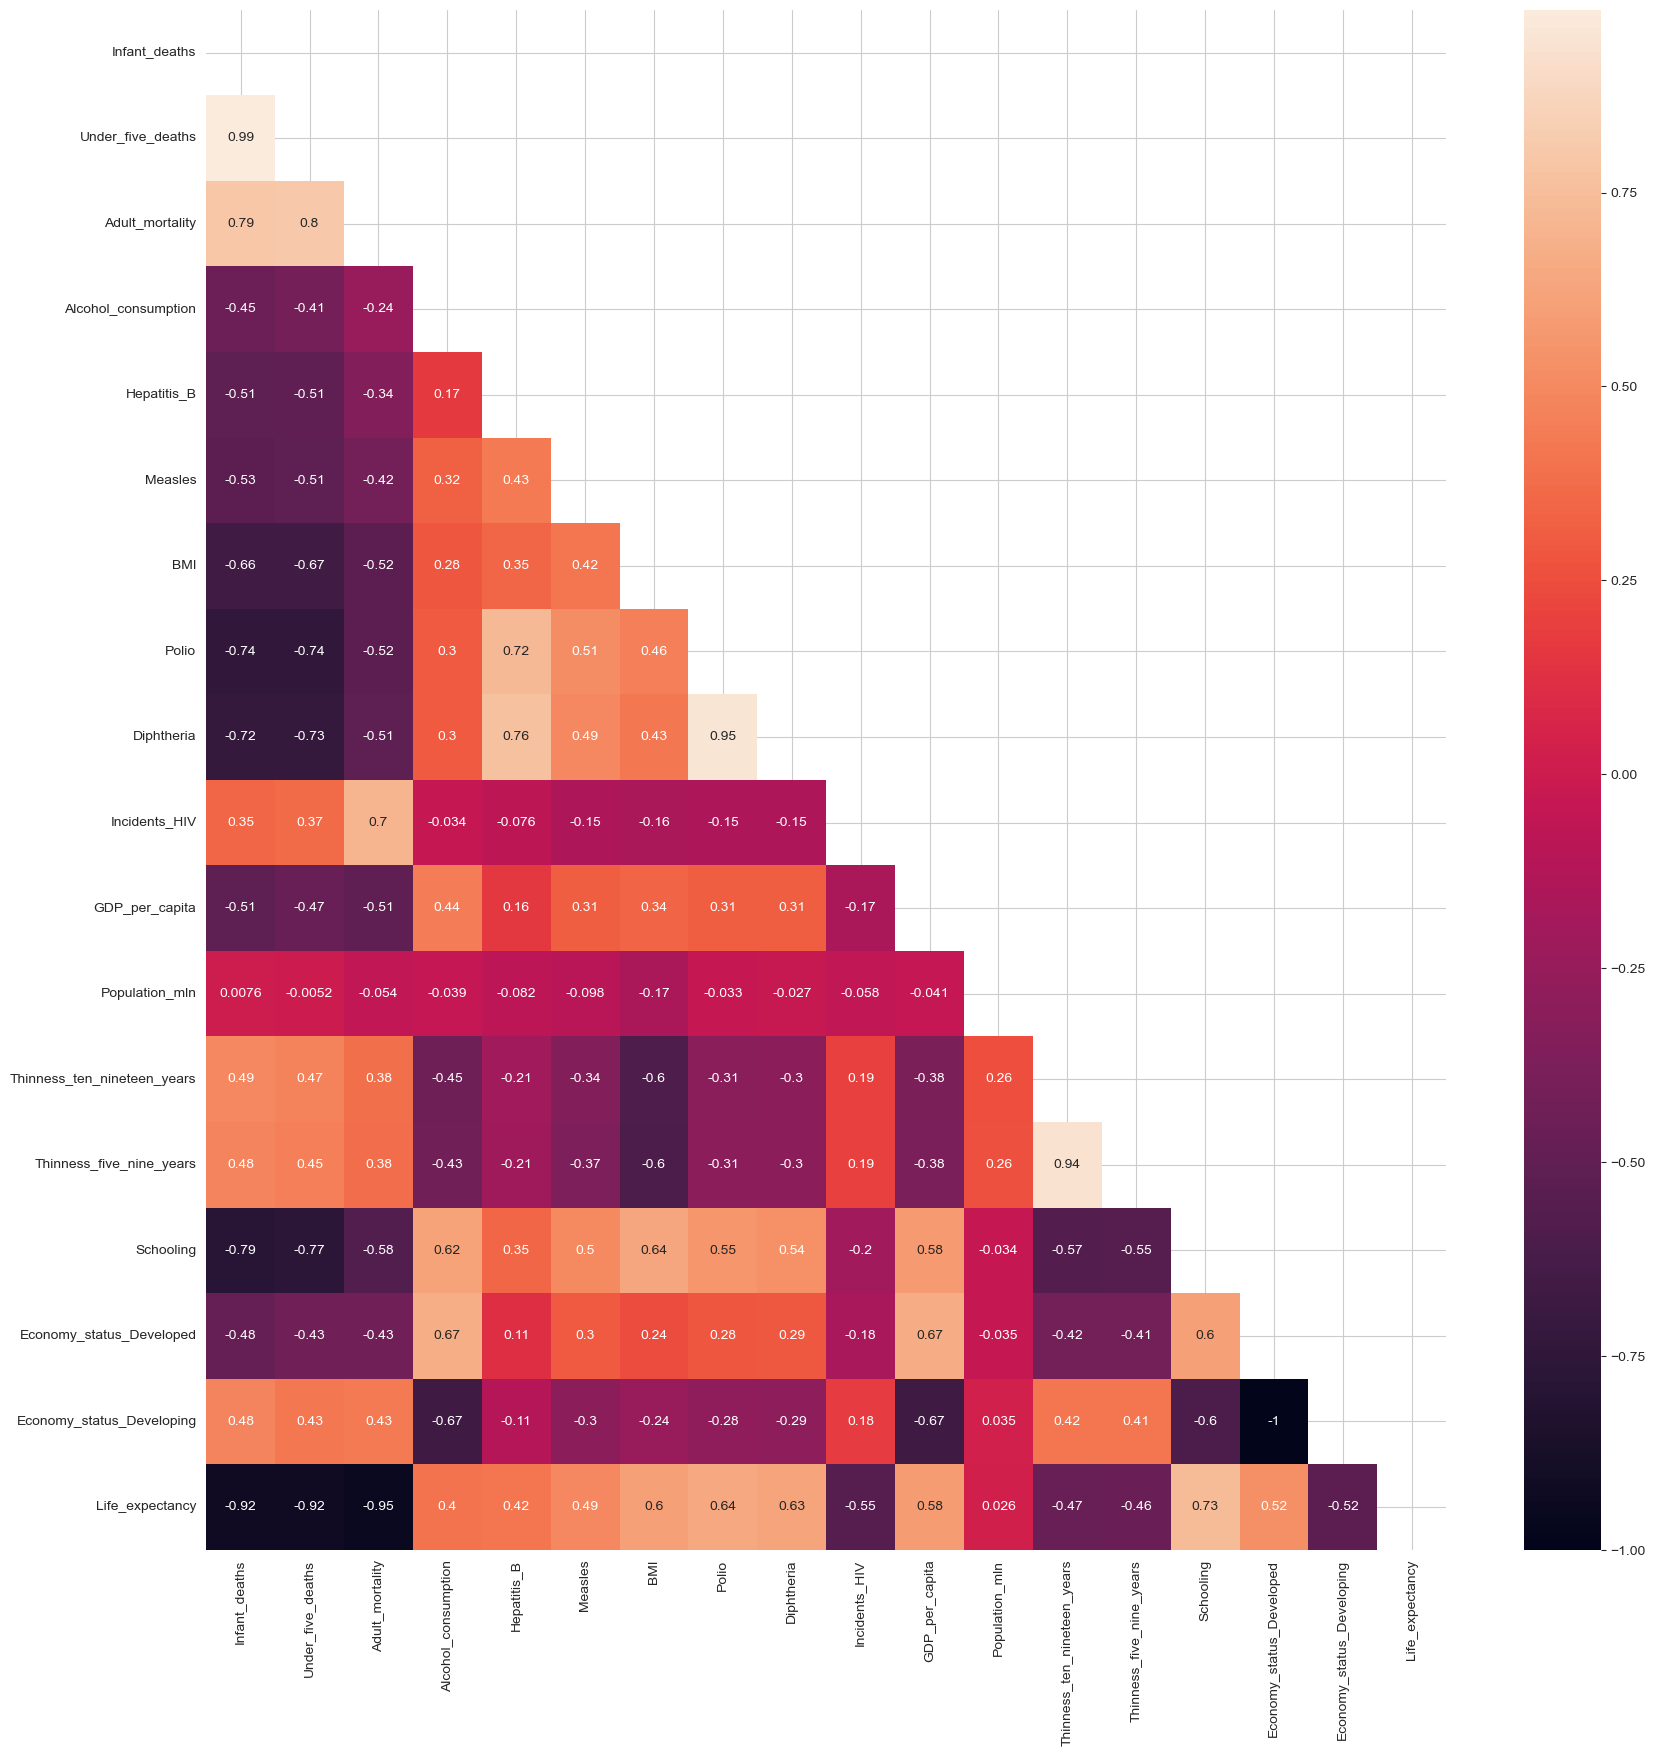

In [9]:
# Look at correlation of all numerical values using a heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(temp_df.corr(),annot=True, mask=np.triu(temp_df.corr()))
plt.show()

**Notable high correlations:**
infant_deaths + under_five_deaths = 0.95
infant_deaths + adult_mortality = 0.79
adult_mortality + under_five_deaths = 0.80
diptheria + polio = 0.95
thinnes_five_nine_years + thinnes_ten_nineteen_years = 0.94

**Notable low correlations:**
life_expectancy + infant_deaths = -0.92
life_expectancy + under_five_deaths = -0.92
life_expectancy + adult_mortality = -0.95

In [10]:
# Get dataframe of just numerical values
numerical_df = temp_df.drop(columns = ['Region', 'Economy_status_Developed', 'Economy_status_Developing'])

In [11]:
for a in numerical_df.columns:
    print(a)

Infant_deaths
Under_five_deaths
Adult_mortality
Alcohol_consumption
Hepatitis_B
Measles
BMI
Polio
Diphtheria
Incidents_HIV
GDP_per_capita
Population_mln
Thinness_ten_nineteen_years
Thinness_five_nine_years
Schooling
Life_expectancy


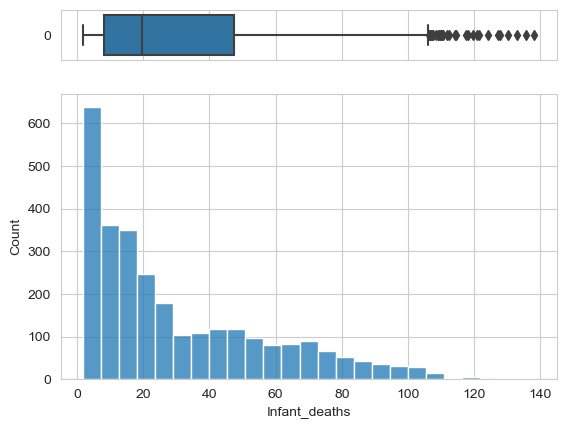

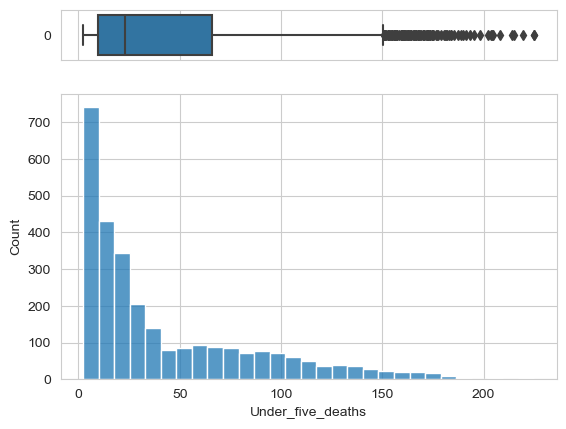

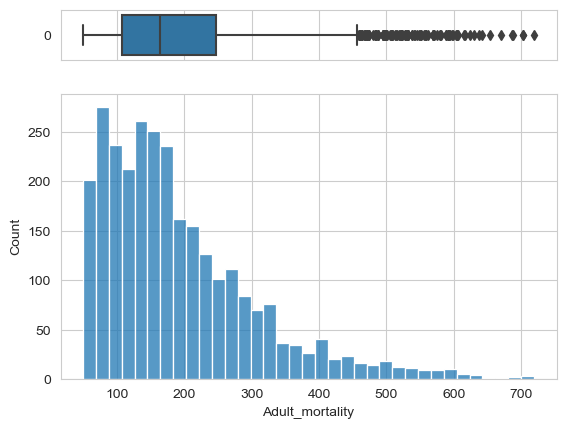

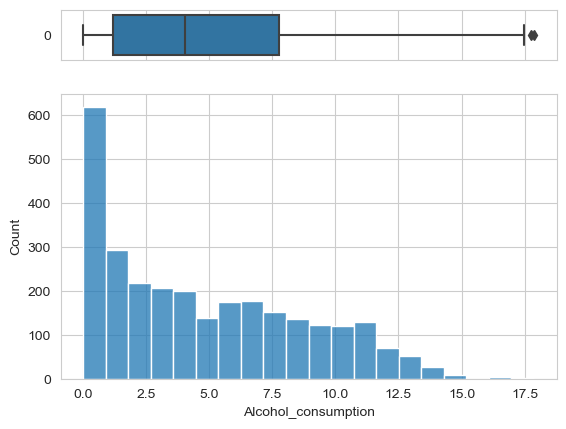

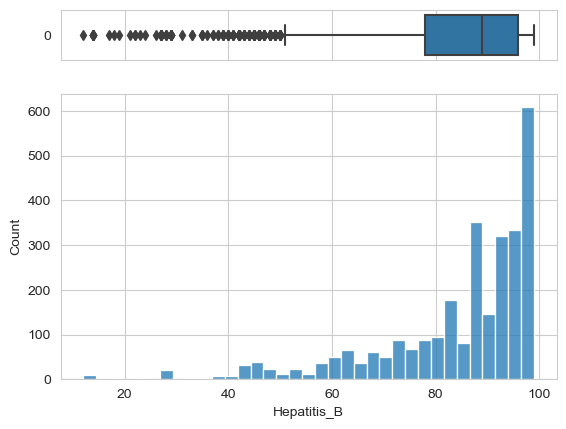

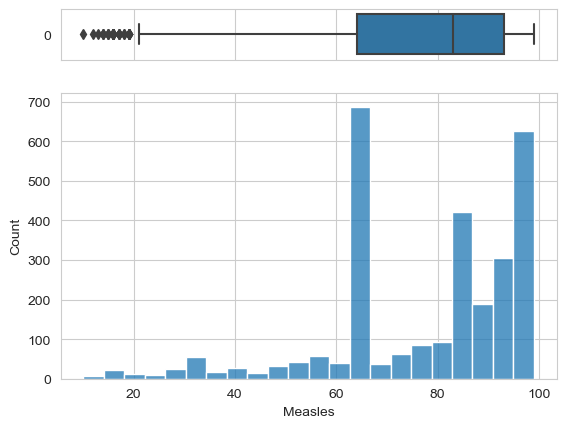

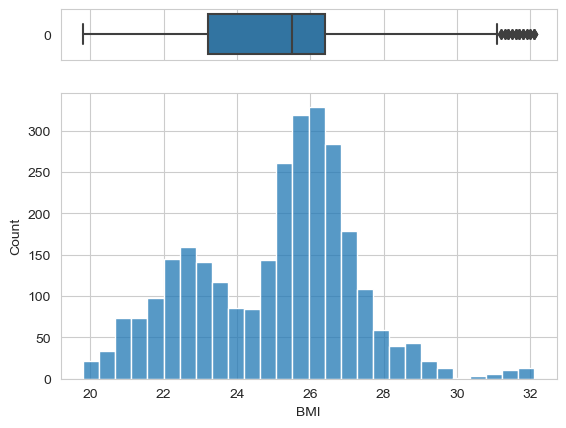

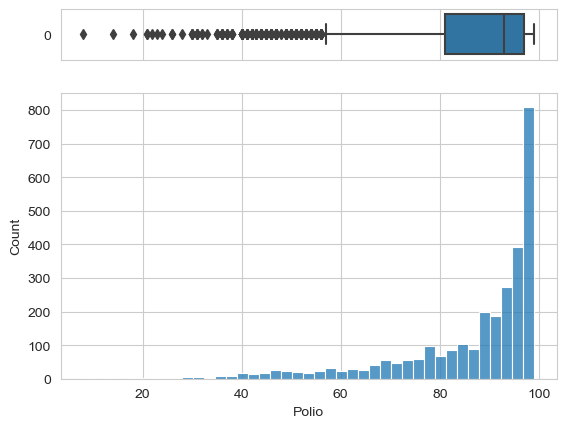

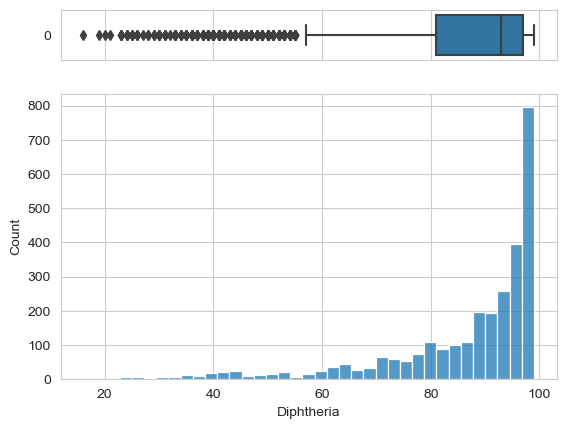

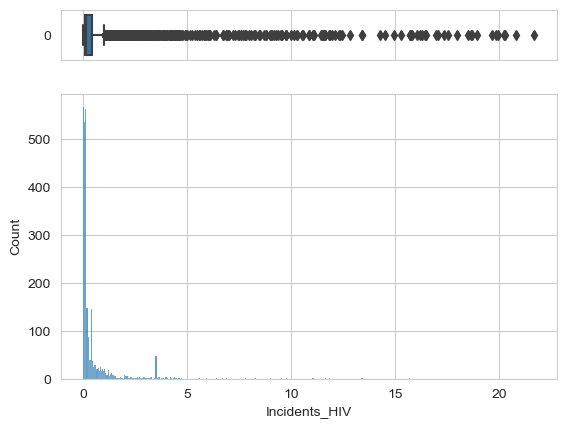

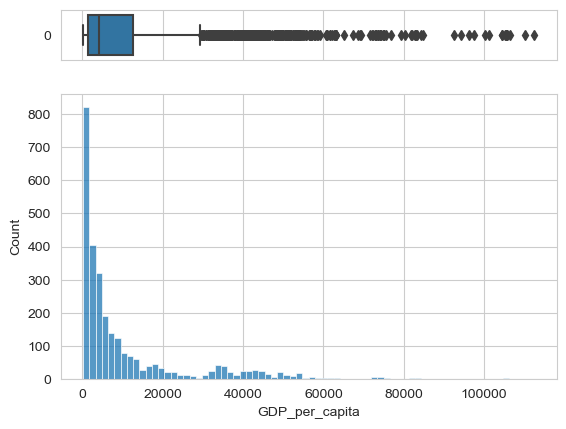

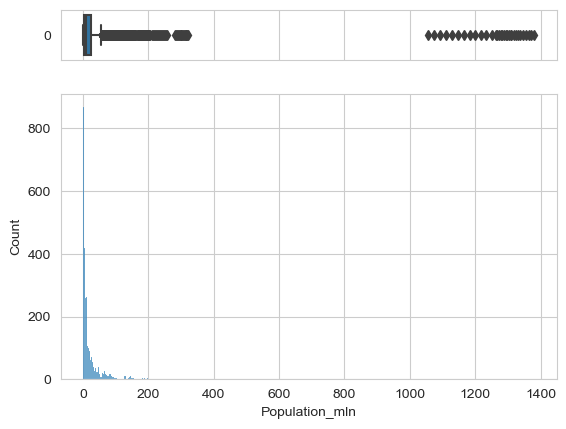

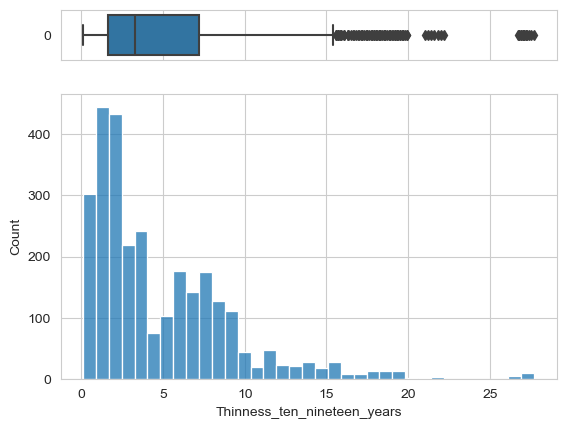

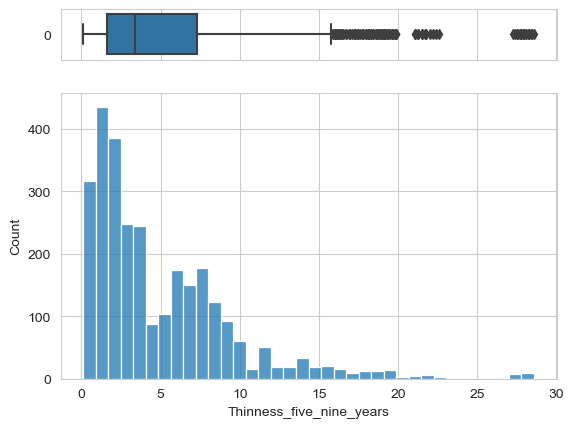

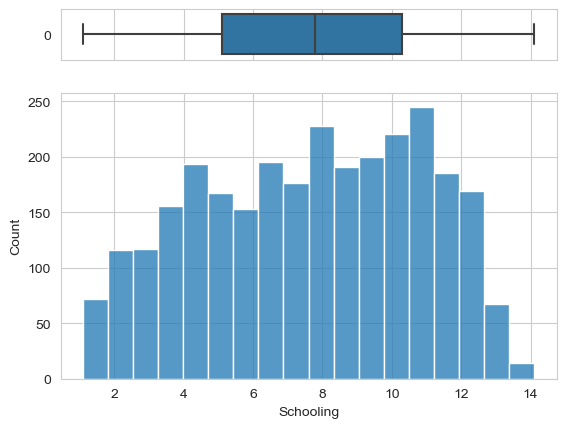

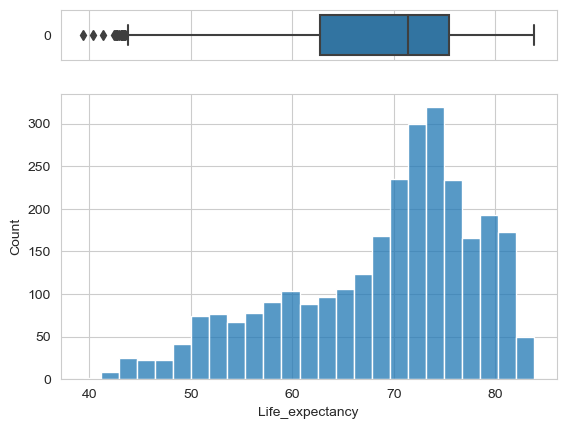

In [12]:
# Define a function that creates boxplot AND histogram
def creating_box_hist(column, df):
    # Create a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Assign a graph to each ax
    sns.boxplot(df[column], ax=ax_box, orient='h')
    sns.histplot(data=df, x=column, ax=ax_hist)

    # Remove x-axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()

# Iterate through columns in numerical_df, create boxplot AND histogram
for column in numerical_df.columns:
    creating_box_hist(column, numerical_df)

Outliers in many columns so we are going to scale the data using the following methods:

Minmax = Schooling, BMI, Alcohol Consumption
Robust = The rest

In [13]:
# Save clean data as csv file
temp_df.to_csv('Clean_Life_Expectancy_Data.csv',index = False)